In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#Loading raw data
raw_train_data =  pd.DataFrame.from_csv('train.tsv', sep='\t', header=0)
raw_test_data =  pd.DataFrame.from_csv('test.tsv', sep='\t', header=0)
raw_train_data = raw_train_data.reset_index()
raw_test_data = raw_test_data.reset_index()

raw_train_data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
raw_train_data.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


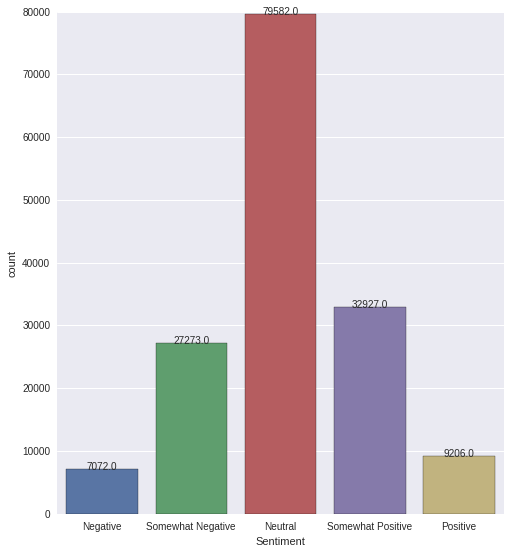

In [5]:
plt.figure(figsize=(8,9))
ax=sns.countplot(x='Sentiment',data=raw_train_data)

labels = ['Negative','Somewhat Negative','Neutral','Somewhat Positive','Positive']
ax.set_xticklabels(labels)

for p in ax.patches:
    height = p.get_height()
    if(np.isnan(height)):
        height=0
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            height,
            ha="center")

In [6]:
print "Total number of sentences: " + str(raw_train_data['SentenceId'][-1:].values)

Total number of sentences: [8544]


In [7]:
from nltk.tokenize import word_tokenize

#Tokenizing the phrases
raw_train_data['Tokens'] = raw_train_data.apply(lambda row: word_tokenize(row['Phrase']), axis=1)

#Converting tokens to lower case
raw_train_data['Tokens'] = raw_train_data.apply(lambda row: map(lambda x:x.lower(),row['Tokens']),axis=1)

raw_train_data['Tokens'].head()

0    [a, series, of, escapades, demonstrating, the,...
1    [a, series, of, escapades, demonstrating, the,...
2                                          [a, series]
3                                                  [a]
4                                             [series]
Name: Tokens, dtype: object

In [144]:
from nltk.corpus import stopwords

#Removing common stop words which do not add meaning or sentiment to the sentence
stop_words = set(stopwords.words('english'))

def stopwordremove(mylist):
    return [w for w in mylist if not w in stop_words]

raw_train_data['Tokens'] = raw_train_data.apply(lambda row: stopwordremove(row['Tokens']), axis=1)

In [8]:
#Remove punctuation
punct = ['.',',',':','``','--','','\'s','\'','&','$','#','\'\'']

def punctremove(mylist):
    return [w for w in mylist if not w in punct]

raw_train_data['Tokens'] = raw_train_data.apply(lambda row: punctremove(row['Tokens']), axis=1)

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(np.array(raw_train_data['Tokens']),
                np.array(raw_train_data['Sentiment']), test_size=0.2)

In [10]:
from gensim.models.doc2vec import LabeledSentence

def labelize(phrase, label_type):
    labelized = []
    for i,v in enumerate(phrase):
        label = '%s_%s'%(label_type,i)
        labelized.append(LabeledSentence(v, [label]))
    return labelized

x_train = labelize(x_train, 'TRAIN')
x_test = labelize(x_test, 'TEST')

In [11]:
x_train[2]

TaggedDocument(words=['watching', 'this', '65-minute', 'trifle'], tags=['TRAIN_2'])

In [12]:
from gensim.models import Word2Vec

phrase_w2v = Word2Vec(size=150)
phrase_w2v.build_vocab([x.words for x in x_train])
phrase_w2v.train([x.words for x in x_train],total_examples = phrase_w2v.corpus_count,epochs=phrase_w2v.iter)

3276024

In [13]:
phrase_w2v['nice']

array([ 0.10759545,  0.29742324, -0.47936103,  0.13754198, -0.42158741,
        0.20306163,  0.0039076 , -0.23193522,  0.09890216, -0.11786469,
        0.10366359, -0.34728044, -0.75759572, -0.16636601,  0.05110803,
        0.21570025, -0.15380317, -0.26031625, -0.27795392,  0.30669731,
       -0.24080403, -0.33658981,  0.43431172,  0.20526418,  0.22465032,
        0.15148968,  0.05488148,  0.02788476, -0.14936745, -0.34954378,
       -0.05130431, -0.07158179,  0.08139463,  0.09658962,  0.1849827 ,
        0.02466248, -0.10300081, -0.32348099, -0.10208371, -0.46039951,
       -0.37184867, -0.07049087, -0.23688549,  0.0150724 ,  0.00840277,
       -0.34533399,  0.22620355,  0.05843164,  0.26978615, -0.37110996,
        0.0168418 , -0.3952646 , -0.01947367, -0.31898665,  0.27208555,
       -0.28569865, -0.21950845,  0.03092971, -0.032866  ,  0.01912653,
       -0.05450856,  0.51664162,  0.31292993,  0.11613011,  0.13655138,
        0.03941527,  0.19555697, -0.27301925,  0.11187467,  0.13

In [14]:
phrase_w2v['a']

array([-0.22799507, -0.21024056,  0.41707197, -0.31796318, -0.63519365,
       -1.4143151 , -1.60570621, -0.67115325,  0.33487967,  0.40187925,
       -0.09246069, -0.37253502, -0.15014249,  0.43475646,  0.97802979,
       -0.12447377,  0.16825388,  1.17288888, -0.20439398,  0.04545932,
        0.57340091,  0.56836277,  0.60806555, -0.0500859 ,  0.01254086,
       -0.05161536, -0.10540849, -0.38866943,  1.03401315,  0.30391803,
       -0.55771255, -1.08538973, -0.25929439, -0.62723106, -0.60723919,
        0.41139749, -0.52572238, -0.40836602, -0.00850472, -0.95935762,
       -0.11452551, -0.18722853, -0.92691416,  1.40986228,  0.28962454,
       -0.14513591,  0.21655211, -0.72100395,  1.06812644, -0.14916049,
       -0.32580352, -0.30032545,  1.11426973, -0.12287421, -0.15965442,
        0.78137839, -0.38786304, -0.22357412,  0.89760482, -1.13262928,
       -1.18644989,  1.29184163,  1.44577992,  0.45672405, -0.09379626,
       -0.42701229, -0.57325208, -0.27221018,  0.36988348, -0.20

In [15]:
phrase_w2v.most_similar('boring')

[('stupid', 0.9351192116737366),
 ('prolonged', 0.9010217189788818),
 ('self-righteous', 0.8949893116950989),
 ('oh', 0.8940533399581909),
 ('sanctimonious', 0.8925156593322754),
 ('safe', 0.8879249691963196),
 ('canadian', 0.8820549249649048),
 ('impersonal', 0.8815926313400269),
 ('fast', 0.8786591291427612),
 ('icky', 0.8703434467315674)]

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=10)
matrix = vectorizer.fit_transform([x.words for x in x_train])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
print 'vocab size :', len(tfidf)

vocab size : 9429


In [17]:
def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += phrase_w2v[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError: # handling the case where the token is not
                         # in the corpus. useful for testing.
            continue
    if count != 0:
        vec /= count
    return vec

In [18]:
from sklearn.preprocessing import scale
train_vecs_w2v = np.concatenate([buildWordVector(z, 150) for z in map(lambda x: x.words, x_train)])
train_vecs_w2v = scale(train_vecs_w2v)

test_vecs_w2v = np.concatenate([buildWordVector(z, 150) for z in map(lambda x: x.words, x_test)])
test_vecs_w2v = scale(test_vecs_w2v)

In [19]:
import keras

# One-hot encoding the labels
num_classes = 5
y_train = keras.utils.to_categorical(y_train, num_classes)
print(y_train.shape)

# One-hot encoding the labels
num_classes = 5
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(124848, 5)
(31212, 5)


In [20]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(Dense(512, activation='relu', input_dim=150))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_vecs_w2v, y_train, epochs=50, batch_size=32, callbacks=[checkpointer],verbose=1)

Epoch 1/50
124848/124848 [==============================] - 25s - loss: 1.1896 - acc: 0.5275    
Epoch 2/50
   736/124848 [..............................] - ETA: 28s - loss: 1.1699 - acc: 0.5394

/usr/local/lib/python2.7/dist-packages/keras/callbacks.py:405: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


124848/124848 [==============================] - 25s - loss: 1.1675 - acc: 0.5369    
Epoch 3/50
124848/124848 [==============================] - 25s - loss: 1.1598 - acc: 0.5407    
Epoch 4/50
124848/124848 [==============================] - 25s - loss: 1.1599 - acc: 0.5426    
Epoch 5/50
124848/124848 [==============================] - 25s - loss: 1.1568 - acc: 0.5454    
Epoch 6/50
124848/124848 [==============================] - 25s - loss: 1.1556 - acc: 0.5455    
Epoch 7/50
124848/124848 [==============================] - 25s - loss: 1.1601 - acc: 0.5471    
Epoch 8/50
124848/124848 [==============================] - 25s - loss: 1.1812 - acc: 0.5490    
Epoch 9/50
124848/124848 [==============================] - 25s - loss: 1.1789 - acc: 0.5493    
Epoch 10/50
124848/124848 [==============================] - 26s - loss: 1.2143 - acc: 0.5496    
Epoch 11/50
124848/124848 [==============================] - 26s - loss: 1.3259 - acc: 0.5506    
Epoch 12/50
124848/124848 [============

In [21]:
score = model.evaluate(test_vecs_w2v, y_test, batch_size=128, verbose=2)
print score[1]

0.575131359703
